# **Statistical Analysis on UFC fights played between 1994 up to 2021**

# Using statistical analysis and programming knowledge in Python.
 
You are given a `csv` file, which include various data entries for UFC fights played between 1994 up to 2021. Each row presents several statistics for a fighter in a specific fight (`Match_ID`) where the result of the fight is stored in (`Winner`). Descriptions for some other important column names is automatically downloaded in a txt file. 

In this exercise, you are asked to perform a number of operations to:
 - perform statistical analysis of the data, and
 - gain insights from the data.

## Suggested/Required Imports

In [ ]:
# suggested imports
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy
from urllib import request
import scipy.stats as stats
from statsmodels import graphics
#import arviz as az

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, RocCurveDisplay, auc, roc_curve
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set_style(style="darkgrid", rc={"axes.facecolor": ".9", "grid.color": ".8"})
sns.set_palette(palette="deep")
sns_c = sns.color_palette(palette="deep")
!pip install kaleido
import plotly.express as px
import kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.9 MB/s eta 0:00:00


In [ ]:
module_url = f"https://drive.google.com/uc?export=view&id=1eZuwv6os65YqO6xwyj6i9ojq3c6yAeCE"
module_url2 = f"https://drive.google.com/uc?export=view&id=1gejV-dCzznzCNCrP6xgBtflWK3sny_ar"
module_name = 'UFC_data.csv'
name2 = 'descriptions.txt'
with request.urlopen(module_url) as f, open(module_name,'w') as outf, request.urlopen(module_url2) as f2, open(name2,'w') as outf2:
  a = f.read()
  outf.write(a.decode('utf-8'))
  a2 = f2.read()
  outf2.write(a2.decode('utf-8'))
df = pd.read_csv('UFC_data.csv')
df = df.drop(columns=['Unnamed: 0'])
df = df.rename(columns={'Win_by_KO/TKO':'Win_by_KO_TKO', 'Avg_CTRL_time(seconds)':'Avg_CTRL_time',
                        'Avg_opp_CTRL_time(seconds)':'Avg_opp_CTRL_time', 'Total_time_fought(seconds)':'Total_time_fought'})
df

,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Split,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID
0,Gustavo Lopez,1,20/03/2021,1,0,1,1,0.000000,0.000000,0.420000,...,0,0,0,1,0,165.10,170.18,135,31,4347
1,Roman Dolidze,2,20/03/2021,1,0,1,2,0.500000,0.000000,0.660000,...,1,0,1,0,0,187.96,193.04,205,32,2867
2,Marcus LeVesseur,3,05/10/2012,2,1,1,3,0.000000,0.000000,0.500000,...,0,0,0,0,0,175.26,177.80,155,30,3106
3,Hacran Dias,4,18/05/2013,3,0,1,4,0.000000,0.000000,0.430000,...,0,1,0,0,0,172.72,175.26,155,28,3765
4,Daron Cruickshank,5,25/07/2015,4,0,1,3,0.125977,0.000000,0.382295,...,1,2,3,0,0,172.72,182.88,155,30,672
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9168,Quinton Jackson,6,27/12/2008,1,1,1,7,1.000000,0.000000,0.518750,...,0,1,2,0,0,185.42,185.42,205,30,1644
9169,Kyoji Horiguchi,20,19/11/2016,65,1,1,12,1.031250,0.000000,0.436250,...,0,4,2,0,0,165.10,167.64,125,26,5816
9170,Daniel Kelly,2,26/11/2016,23,1,1,2,0.000000,0.125000,0.423750,...,0,2,1,1,0,182.88,177.80,185,39,5584
9171,Misha Cirkunov,6,14/09/2019,5,1,1,7,0.000000,0.562500,0.523125,...,0,0,1,4,0,190.50,195.58,205,32,542


## 1 – `pandas` for Probability and Visualisation 

### 1.1 The Tall, Young and Winner
Find the probability of a fighter winning the fight while *(1) being younger than 25 years of age*, and *(2) taller than 180 cms*. Write a one-liner to solve this. $P\big[\text{Win} | (\text{height_cms} > 180)\cap \text{Age} <25\big]$

In [ ]:
#Filtering by Age and Height, and then mean aggregating
df[(df['Age']<25) & (df['Height_cms'] > 180)]['Winner'].mean() 

0.6138107416879796

###1.2 The most durable fighters 
Find the most durable fighters among all the fighters in the dataframe. You need to filter out `df` for the **10 most** durable fighters who **wins** where they **received higher than 100 significant strikes 'landed'**, but **not had any knockdowns (KD)**.    

In [ ]:
#Filtering with durabality requirements
df_durables = df[(df.Avg_opp_SIG_STR_landed>100)  & (df.Avg_KD==0) & (df.Winner==1)] 

# Sorting for top10 based upon Total time fought
top10_durables = df_durables.sort_values(by='Total_time_fought', ascending=False).head(10)  

top10_durables


,Fighter,Referee,Date,Location,Winner,Title_bout,Weight_class,Avg_KD,Avg_opp_KD,Avg_SIG_STR_pct,...,Win_by_Decision_Unanimous,Win_by_KO_TKO,Win_by_Submission,Win_by_TKO_Doctor_Stoppage,Height_cms,Reach_cms,Weight_lbs,Age,Match_ID,Win_by_KO_TKO_ratio
6657,Blagoy Ivanov,2,09/03/2019,60,1,1,9,0.0,0.0,0.220,...,0,0,0,0,180.34,185.42,250,32,926,NaN
4253,Roxanne Modafferi,21,06/07/2018,1,1,1,11,0.0,0.0,0.265,...,0,0,0,0,170.18,175.26,125,35,4273,NaN
71,John Castaneda,19,20/02/2021,1,1,1,1,0.0,0.0,0.420,...,0,0,0,0,167.64,180.34,135,29,3518,NaN
2137,Steven Peterson,8,06/07/2018,1,1,1,4,0.0,0.0,0.250,...,0,0,0,0,177.80,177.80,145,28,5518,NaN
7981,Jessica Aguilar,2,14/07/2018,78,1,1,10,0.0,0.0,0.450,...,0,0,0,0,160.02,160.02,115,36,3252,NaN
5197,Leslie Smith,158,16/07/2014,75,1,1,8,0.0,0.0,0.320,...,0,0,0,0,175.26,167.64,135,31,4369,NaN
4936,Gabe Green,8,13/02/2021,1,1,1,5,0.0,0.0,0.460,...,0,0,0,0,177.80,185.42,170,27,3590,NaN
111,Lara Procopio,19,06/02/2021,1,1,1,11,0.0,1.0,0.560,...,0,0,0,0,162.56,170.18,125,25,4859,NaN
2500,Irene Aldana,4,14/01/2018,98,1,1,8,0.0,0.5,0.395,...,0,0,0,0,175.26,172.72,135,29,3666,NaN
1229,Seo Hee Ham,2,28/11/2015,52,1,1,10,0.0,0.0,0.520,...,0,0,0,0,157.48,157.48,115,28,5746,NaN


###1.3 KO-Machines
Find probability of fighters who has **at least 2 KO/TKOs** ,and whose **win by KO/TKO ratio is higher than 0.75**.

In [ ]:
# optional lines for adding the below line to avoid the SettingWithCopyWarning
import warnings
warnings.filterwarnings('ignore')

# Subset the DataFrame to include only fighters who have at least 2 KO/TKOs
ko_df = df[df['Win_by_KO_TKO'] >= 2]

# Calculate the win by KO/TKO ratio for each fighter in the subset
ko_df['KO/TKO Ratio'] = ko_df['Win_by_KO_TKO'] / ko_df['Wins']

# Subset the DataFrame again to include only fighters whose win by KO/TKO ratio is higher than 0.75
high_ratio_df = ko_df[ko_df['KO/TKO Ratio'] > 0.75]

# Calculate the probability of fighters in the final subset
prob = len(high_ratio_df) / len(df)


print(prob)


0.051782404883898396


###1.4 - Ideal Body & Strategy 
Create a figure with two subplots by using a filtered-out version of the dataframe `df` including only rows of **WINNERS**.  
- Subplot 1: Create a **2D histogram** via hexagonal bins for `'Height_cms'` and `'Weight_lbs'` columns of the data frame. Color corresponds to number of winners for each height-weight pair.
- Subplot 2: Create a heatmap figure for plotting correlations between columns of `['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed' 'Avg_TD_landed', 'Avg_HEAD_landed', 'Avg_BODY_landed', 'Avg_LEG_landed' 'Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed', 'Avg_CTRL_time']`

**In order to solve this question, you need to use either `pandas` or `matplotlib` library visualisation commands. You cannot use `seaborn, plotly` or other libraries for this question.**

**You do not have to replicate the figures given below, but axes labels, titles and other visualisation details should be there.**

![](https://drive.google.com/uc?export=view&id=1aGAk4_6KMcOjWmSWhqYlqmkDGJAY8sR8)

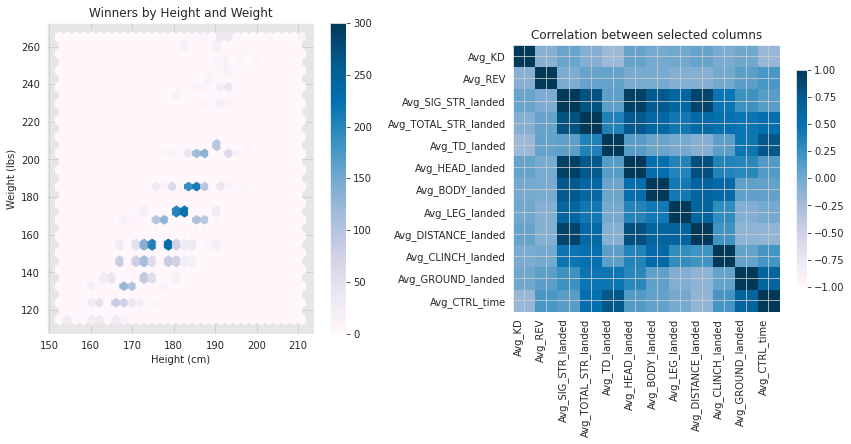

In [ ]:
# Filtering the dataset for winners only
df_winners = df[df["Winner"] == 1]

# Subplot 1: 2D histogram via hexagonal bins for 'Height_cms' and 'Weight_lbs'
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

hb=ax[0].hexbin(df_winners["Height_cms"], df_winners["Weight_lbs"], gridsize=30, cmap='PuBu', vmin=0, vmax=300)
ax[0].set_xlabel('Height (cm)')
ax[0].set_ylabel('Weight (lbs)')
ax[0].set_title('Winners by Height and Weight')

# Subplot 2: Heatmap for correlations between selected columns
corr_cols = ['Avg_KD', 'Avg_REV', 'Avg_SIG_STR_landed', 'Avg_TOTAL_STR_landed', 'Avg_TD_landed', 'Avg_HEAD_landed',
             'Avg_BODY_landed', 'Avg_LEG_landed', 'Avg_DISTANCE_landed', 'Avg_CLINCH_landed', 'Avg_GROUND_landed',
             'Avg_CTRL_time']

#Computing correlation matrix between columns of DataFrame df_winners.
corr = df_winners[corr_cols].corr()

#Defining plots
cmap = plt.get_cmap('coolwarm')
im = ax[1].imshow(corr, cmap='PuBu', vmin=-1, vmax=1)
ax[1].set_xticks(range(len(corr_cols)))
ax[1].set_xticklabels(corr_cols, rotation=90, ha='right')
ax[1].set_yticks(range(len(corr_cols)))
ax[1].set_yticklabels(corr_cols)
ax[1].set_title('Correlation between selected columns')
fig.colorbar(im, ax=ax[1], shrink=0.7)


cb = fig.colorbar(hb, ax=ax[0])

#Plotting
plt.tight_layout()
plt.show()

##2 – Variable selection via linear regression analysis

In **variable selection** ('variable' means the same as 'predictor'), variables get iteratively added or removed from the regression model. Once finished, the model typically contains only a subset of the original variables. It makes it easier to interpret the model, and in some cases it makes it generalise better to new data. 

To perform variable selection, create a function `select_variable(df, main_pred, main_target, alpha)`, where 
 
 - `main_pred` is a list of variables includes columns of the data frame except for `'Fighter',	'Referee',	'Date'` and `Match_ID`.
 - `main_target` is the variable for the regression, `'Winner'` 
 - `alpha` is the significance level for selecting significant predictors

The function should return

 - `main_pred` is a list which stores the selected subset of initial `main_pred`.

To calculate regression fits and $p$-values you will use `statsmodels`. The general procedure follows two stages:

 - **Stage 1 (adding predictors):** you build a model by adding variables one after the other. You keep adding variables that increase the **adjusted $R^2$** value (provided by `statsmodels` package). 
  
  - Start with an empty set of variables
  
  - Fit multiple one-variable regression models. In each iteration, use one of the variables provided in predictors. The variable that leads to the largest increase in adjusted $R^2$ is added to the model.
  
  - Now proceed by adding a second variable into the model. Starting from the remaining variables, again choose the variable that leads to the largest increase in adjusted $R^2$.
  
  - Continue in the same way for the third, fourth, … variable.
  
  - You are finished when there is no variable left that increases adjusted $R^2$.
 
 - **Stage 2 (removing non-significant predictors)**: if any of the utilised predictors are not significant, you need to remove them. Keep removing variables until all variables in the model are significant.

  - Start by fitting a model using the variables that have been added to the model in Stage 1.
  
  - If there is a variable that is not significant, remove the variable with the largest $p$-value and fit the model again with the reduced set of variables.
  
  - Keep removing variables and re-fitting the model until all remaining variables are significant.
  
  - The remaining significant variables are the output of your function.

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

def select_variable(df, main_pred, main_target, alpha):

    """
    Selects significant predictors for a given target variable from a dataframe.

    Parameters:
    -----------
    df : pandas dataframe
        The dataframe containing the data.
    main_pred : list
        A list of column names to be used as potential predictors.
    main_target : str
        The name of the column to be used as the target variable.
    alpha : float
        The significance level for the hypothesis test.

    Returns:
    --------
    list
        A list of column names that are significant predictors for the target variable.

    """

    # drop rows with NaN or inf values
    df = df.replace([np.inf, -np.inf], np.nan).dropna()
    
    # create a list of columns to exclude
    exclude = ['Fighter', 'Referee', 'Date', 'Match_ID', main_target]
    
    # create a list of potential predictors
    predictors = [col for col in main_pred if col not in exclude]
    
    # initialize an empty list to store significant predictors
    sig_predictors = []
    
    # Stage 1 (adding predictors):
    while True:
        best_score = -np.inf
        best_col = None
        for col in predictors:
            model_cols = sig_predictors + [col]
            X = df[model_cols]
            y = df[main_target]
            X = sm.add_constant(X)
            model = sm.OLS(y, X)
            results = model.fit()
            score = results.rsquared_adj
            if score > best_score:
                best_score = score
                best_col = col
        if best_score > -np.inf:
            predictors.remove(best_col)
            sig_predictors.append(best_col)
        else:
            break
    
    # Stage 2 (removing non-significant predictors)
    while True:
        X = df[sig_predictors]
        y = df[main_target]
        X = sm.add_constant(X)
        model = sm.OLS(y, X)
        results = model.fit()
        pvalues = results.pvalues[1:]
        max_pvalue = pvalues.max()
        if max_pvalue > alpha:
            exclude_col = pvalues.idxmax()
            sig_predictors.remove(exclude_col)
        else:
            break
    
    return sig_predictors

In [ ]:
# define input arguments of the function before and then run the code below
main_pred = select_variable(df, df.columns, 'Winner', 0.05)
main_pred

['Age',
 'Avg_TD_landed',
 'Longest_win_streak',
 'Win_by_Decision_Split',
 'Reach_cms',
 'Current_lose_streak',
 'Title_bout',
 'Avg_HEAD_landed',
 'Total_time_fought',
 'Avg_opp_CTRL_time',
 'Avg_CTRL_time',
 'Avg_SIG_STR_pct',
 'Avg_opp_TD_landed',
 'Avg_opp_TD_pct',
 'Avg_opp_CLINCH_landed',
 'Avg_opp_DISTANCE_landed']

##3 - Regression Analysis 

In this part of the statistical analysis, you are asked to develop various regression models for predicting the winning probability of a fighter using the significant predictors found in 2.

You are asked to write a function `regression_models_UFC(df, main_pred, main_target)` that takes the data frame `df`, significant predictors `main_pred` and target `main_target` as its arguments, and

- splits the data into training and test samples with 1:1 ratio. 
- fits **Linear, Logistic, Poisson** and **Bayesian regression models** using the training samples, and then predicts winning probabilities using the test samples.

`regression_models_UFC()` returns a single object `results` which is a `tuple` of `tuples` each element of which is: 
 - `sm.` model objects for each regression model `(lin_reg, logit_reg, poisson_reg, bayes_reg)`
 - predicted probabilities for each model --> `(y_lin, y_logit, y_poisson, y_bayes)`
 - splitted training and test samples --> `(x_train, x_test, y_train, y_test)` 


In [ ]:
def regression_models_UFC(df, main_pred, main_target):

    """
    Performs three types of regression models (linear, logistic, and probit) on the input UFC dataframe and returns the
    regression results, predicted values, and train-test split data.

    Parameters:
        df (pandas.DataFrame): A dataframe containing the UFC data.
        main_pred (list): A list of column names to use as predictors for the regression models.
        main_target (str): The name of the column to use as the target variable for the regression models.

    Returns:
        Tuple: A tuple containing:
            - A tuple of regression model results (linear, logistic, and probit).
            - A tuple of predicted values for each model (linear, logistic, and probit).
            - A tuple of train-test split data (x_train, x_test, y_train, y_test).
    """

    # train test split
    x = df[main_pred]
    y = df[main_target]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

    # linear regression
    lin_reg = sm.OLS(y_train, sm.add_constant(x_train)).fit()
    y_lin = lin_reg.predict(sm.add_constant(x_test))
    
    # Logistic regression
    logit_reg = sm.Logit(y_train, sm.add_constant(x_train)).fit()
    y_logit = logit_reg.predict(sm.add_constant(x_test))
    
    # Probit regression
    probit_reg = sm.Probit(y_train, sm.add_constant(x_train)).fit()
    y_probit = probit_reg.predict(sm.add_constant(x_test))
 

    
    # function return
    results = ((lin_reg, logit_reg, probit_reg), (y_lin, y_logit, y_probit), (x_train, x_test, y_train, y_test))
    return results

    

In [ ]:
# define input arguments of the function before and then run the code below
results = regression_models_UFC(df, main_pred, 'Winner')

Optimization terminated successfully.
         Current function value: 0.673472
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.673467
         Iterations 4


##4 – Data Analytics, performance and visualisation

### 4.1 - In-Fight Winning Analysis
Assume you are the data analyist of an UFC fighter. You have developed a Logistic regression model above and is going to use this to make an in-Fight analysis. 

During the round 4, you are creating a function `in_fight_analysis(results)`. This function is going to take as input the output of `regression_models_UFC()` function will give you some data analysis insights for the last round of the fights. The function `in_fight_analysis(results)` will
 - randomly select a fighter from the test data. (Hint: select a row, not a fighter!) Assume that this is your fighter!
 - analyse two parameters of: `'Avg_HEAD_landed'` and `Avg_opp_CTRL_time`. (Hint: These two parameters are two of the significant predictors. If your `select_variable()` function does not return these two, you are doing something wrong.)
 - create a `seaborn` heatmap figure that depicts how changes on the two paramters mentioned above affects winning probablity of your fighter.

For both of the variables, your arrays will start from your fighter's existing values, and you are going to check changes up to two times higher from those values.

Winning probabilities will be predicted by using the Logistic regression model developed in 3.

![](https://drive.google.com/uc?export=view&id=1jyl53cNpU-TEhxtSWBKzfkV39wotO-M4)

Analyzing in-fight strategy for fighter: 5763


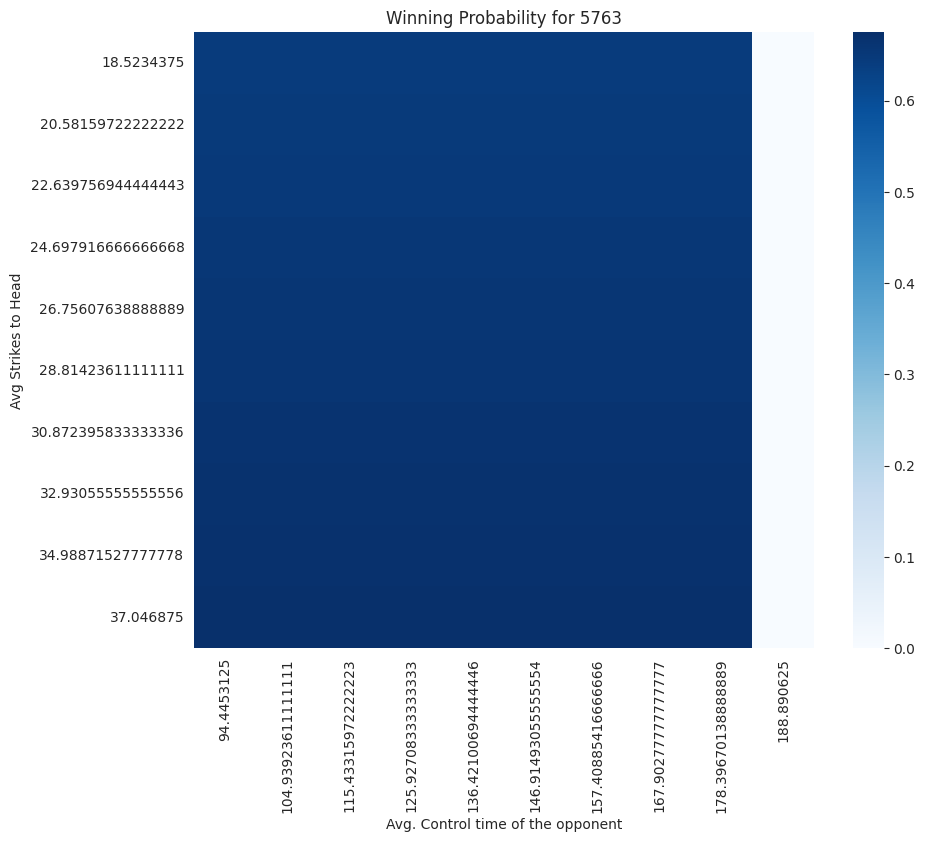

In [ ]:
import random
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

def in_fight_analysis(results):

    """
    Analyzes the in-fight strategy for a randomly selected fighter from the test data and visualizes the winning 
    probabilities for different combinations of the fighter's average number of strikes to the head and the opponent's 
    average control time using a heatmap.
    
    Args:
        results (tuple): A tuple of regression models, predictions, and training and testing data obtained from the 
            `regression_models_UFC` function.
    
    Returns:
        None
    """
    
    # unpack the results
    (lin_reg, logit_reg, probit_reg), (y_lin, y_logit, y_probit), (x_train, x_test, y_train, y_test) = results
    
    # select a random fighter from test data
    index = random.randint(0, len(x_test) - 1)
    fighter_data = x_test.iloc[index]
    fighter_name = fighter_data.name
    print("Analyzing in-fight strategy for fighter:", fighter_name)

    # check if the required columns are present in the data
    if 'Avg_HEAD_landed' not in fighter_data.index or 'Avg_opp_CTRL_time' not in fighter_data.index:
        print("Required columns not present in data")
        return
    
    # get the fighter's current values of the selected parameters
    head_value = fighter_data['Avg_HEAD_landed']
    ctrl_value = fighter_data['Avg_opp_CTRL_time']
    
    # create grid of values to test
    head_grid = np.linspace(head_value, head_value * 2, 10)
    ctrl_grid = np.linspace(ctrl_value, ctrl_value * 2, 10)
    head_index = fighter_data.index.get_loc('Avg_HEAD_landed')
    ctrl_index = fighter_data.index.get_loc('Avg_opp_CTRL_time')
    X_grid = np.zeros((len(head_grid), len(ctrl_grid), len(fighter_data)))
    X_grid[:,:,head_index] = head_grid.reshape(-1,1)
    X_grid[:,ctrl_index,:] = ctrl_grid.reshape(-1,1)
    X_grid = X_grid.reshape(-1, len(fighter_data))
    
    # predict winning probabilities for each set of values in the grid
    y_pred = logit_reg.predict(sm.add_constant(X_grid))
    
    # reshape the predictions to match the grid shape
    y_pred = y_pred.reshape(len(head_grid), len(ctrl_grid))
    
    # plot the heatmap
    plt.figure(figsize=(10,8))
    sns.heatmap(y_pred,cmap='Blues',xticklabels=ctrl_grid, yticklabels=head_grid)
    plt.title(f"Winning Probability for {fighter_name}")
    plt.xlabel("Avg. Control time of the opponent")
    plt.ylabel("Avg Strikes to Head")
    plt.show()
probablity_of_win = in_fight_analysis(results)


###4.2 - Height-Reach Analysis 
Write a function `height_reach_analysis(df, results)` in order to analyse the effects of height and reach differences between fighters. You are asked to:

- take the dataframe `df` and regression modelling output object `results`.
- calculate height and reach differences for each specific fight.
  - A unique `'Match_ID'` corresponds to two different rows in `df`, e.g. the winner and the loser. 
  - For each pair you need to find the difference between columns and create two new columns with these values: `'dHeight'` and `'dReach'`. 
  - If fighter's values are higher, the specific difference value will be positive, otherwise you should set it to negative values. 
  - An example:
  ```
  	    Fighter	        Winner	   Height_cms	Reach_cms	   dHeight	 dReach   Match_ID
3132	Ray Borg	         1	      162.56	   160.02	     -2.54	   -10.16   975
8947	Jussier Formiga	  0	      165.10	   170.18	      2.54	    10.16   975
  ```
- filter out `df` for the test data and add a new column `'WinProb'` from the input argument `result` belonging to Probit regression.
- plot a scatter plot where `'dHeight'` and `'dReach'` correspond to axes and `'WinProb'` colour details of the plot. You must use `plotly.express` module for this question.

![](https://drive.google.com/uc?export=view&id=1rZFDAqaoIUP_2XAtCisrhgkKyRF7OGSP)

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px

def height_reach_analysis(df, results):
  
    """
    Performs an analysis of height and reach differences in MMA fights using a provided dataframe and regression results.

    Args:
    df (pandas.DataFrame): A dataframe containing MMA fight data, with columns 'Height_cms', 'Reach_cms', 'Winner', and 'Match_ID'.
    results (tuple): A tuple containing the regression results for three models: linear regression, logistic regression, and probit regression. Each model's results are in a tuple containing the model itself and the training and testing data used.

    Returns:
    None

    Displays a scatter plot of height and reach differences for fights in the testing data, with color indicating the winning probability of the fighter with greater height and reach according to the probit regression model. The plot is displayed using Plotly Express.
    """

    # create a copy of the original dataframe
    df_copy = df.copy()

    # calculate height and reach differences for each specific fight
    df_copy['dHeight'] = np.where(df_copy['Winner'] == 1, df_copy['Height_cms'] - df_copy['Height_cms'].shift(-1), df_copy['Height_cms'].shift(-1) - df_copy['Height_cms'])
    df_copy['dReach'] = np.where(df_copy['Winner'] == 1, df_copy['Reach_cms'] - df_copy['Reach_cms'].shift(-1), df_copy['Reach_cms'].shift(-1) - df_copy['Reach_cms'])
    df_copy = df_copy.dropna() # remove the last row if it has NaN value

    # filter out the test data
    _, _, _, y_test = results[2]
    df_test = df_copy[df_copy['Match_ID'].isin(y_test.index)]
    
    # add 'WinProb' column from the input argument result belonging to Probit regression
    probit_reg = results[0][1] # Probit regression model is the second model in the tuple
    df_test['WinProb'] = probit_reg.predict(sm.add_constant(df_test[main_pred]))

    # plot the scatter plot
    fig = px.scatter(df_test, x='dHeight', y='dReach', color='WinProb', color_continuous_scale='plasma', title='Height-Reach Analysis')
    fig.update_layout(coloraxis_colorbar=dict(title='Winning Probability', yanchor='top', y=1, ticks='outside'))
    fig.update_traces(marker_size=40)
    fig.update_layout(width=825, height=600)
    fig.update_xaxes(title='Height Difference [cm]')
    fig.update_yaxes(title='Reach Difference [cm]')
    fig.show()

height_reach_analysis(df, results)

<ipython-input-141-a7585e46de00>:34: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



###4.3 - Prediction Perfomance
You will now need to visualise the prediction performance of the models, and evaluate them in terms of prediction accuracy (Acc%), mean square error (MSE) and area under curve (AUC) metrics. For this purpose, create a function `prediction_perf(gt, MLE_model_predictions)` which evaluates the prediction performance of the reference models. Up to this point, you should have obtained

 - predictions from each model, stored in `model_predictions`.
 - The ground-truth values from data frames `df`, stored in `gt`.

Assume predicted values for a given model are stored in a variable $P$. The first performance measure will be the MSE, and will be calculated for each model from the expression below:

$$ MSE = \dfrac{1}{N}\sum_{i=0}^{N-1} (P_i - Winner_i)^2$$

In order to obtain the prediction accuracy for each model, you need to use `sklearn` module and its `accuracy_score()` function. Similarly, by using `sklearn` module methods `roc_curve()` and `auc()` find ROC curve parameters and AUC metric for each prediction model. 

In order to obtain performance analysis results in a neatly way, you then need to create a new `pandas` dataframe `df_results` which will be in the form of

```
+----+-------------+--------+--------+-------+
|    | Model       |   Acc% |    MSE |   AUC |
+====+=============+========+========+=======+
|  0 | Linear      |  77.00 | 0.1260 | 0.911 |
+----+-------------+--------+--------+-------+
|  1 | Logistic    |  81.00 | 0.1086 | 0.911 |
+----+-------------+--------+--------+-------+
|  2 | Probit      |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
|  3 | Bayesian    |  76.00 | 0.1490 | 0.884 |
+----+-------------+--------+--------+-------+
```

Consequently, the `prediction_perf()` function should `print` and `return` the data frame `df_results`.

In [ ]:
from sklearn.metrics import accuracy_score, mean_squared_error, roc_curve, auc
import pandas as pd

def prediction_perf(gt, model_predictions):
  
    """
    Computes and returns the performance metrics for a set of predictions made by three models:
        - Linear regression
        - Logistic regression
        - Probit regression

    Parameters:
    -----------
    gt : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    model_predictions : list of array-like of shape (n_samples,)
        List containing the predictions made by the three regression models.
        The order of the list should be [linear_reg_pred, logit_reg_pred, probit_reg_pred].

    Returns:
    --------
    df_results : pandas DataFrame
        A DataFrame containing the performance metrics of the three models.
        The DataFrame has the following columns:
            - 'Model': the name of the model (Linear, Logistic, Probit).
            - 'Acc%': the accuracy of the model in percentage.
            - 'MSE': the mean squared error of the model.
            - 'AUC': the area under the ROC curve of the model.
    """

    mse_list = []
    acc_list = []
    auc_list = []

    for pred in model_predictions:
        mse = mean_squared_error(gt, pred)
        mse_list.append(mse)

        acc = accuracy_score(gt, pred.round())
        acc_list.append(acc)

        fpr, tpr, _ = roc_curve(gt, pred)
        roc_auc = auc(fpr, tpr)
        auc_list.append(roc_auc)

    df_results = pd.DataFrame({'Model': ['Linear', 'Logistic', 'Probit'],
                               'Acc%': acc_list,
                               'MSE': mse_list,
                               'AUC': auc_list})

    return df_results
df_results = prediction_perf(results[2][3], results[1])
print(df_results)

      Model      Acc%       MSE       AUC
0    Linear  0.560061  0.244973  0.582540
1  Logistic  0.559189  0.244962  0.582513
2    Probit  0.559625  0.244957  0.582515
